#### IMPORT

In [1]:
import os, platform

from IPython.display import clear_output
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

from matplotlib import pyplot


from keras.utils.np_utils import to_categorical 
from tensorflow.keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Dense, Dropout, \
    BatchNormalization, Flatten, LSTM
# from scikeras.wrappers import KerasClassifier
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import load_model

from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, auc


from sklearn.metrics import roc_curve, auc

from itertools import cycle
from scipy import interp
from scipy.optimize import brentq
from scipy.interpolate import interp1d

#### PARAMETERS
- Set the condition
> * N_FEATURES: Number of Features
> * CHECK_BLANKS: Check for blank data. If any blank data is found, the whole row of data will be deleted.
> * CHECK_CLASS_IMBALANCE: Check for dataset class imbalance. The more balance the dataset, the less biases the model will be.

In [2]:
##############################
# # deep learning features # #
##############################
SEED = 1005 # random seed for reproducibility

# should make this dynamic
N_FEATURES = 220 #36 #220 #9 #220 #36 #36 #120 #220
# N_CLASSES= 9
TIMESTEPS = 1
EPOCH=200
BATCH_SIZE=5

###############
# # dataset # #
###############
DATASET_DIR_NAME = "dataset"
SAMPLE_DATASET_NAME = "own_train_full" + ".csv"
# ACTUAL_DATASET_NAME = "own_test_full" + ".csv"

################### own_full_model
# ACTUAL_DATASET_NAME = "combi_andy_full" + ".csv" # 34/60 = 5 + 29/55 | T95: 5/5 16/29 | T99: 5/5 11/29
# ACTUAL_DATASET_NAME = "combi_azfar_full" + ".csv" # 15/60 = 5 + 10/55 | T95: 5/5 3/10 | T99: 5/5 2/10
# ACTUAL_DATASET_NAME = "combi_bryce_full" + ".csv" # 30/60 = 3 + 1 26/55 | T95: 3/4 20/26 | T99: 0/4 20/26
# ACTUAL_DATASET_NAME = "combi_chris_full" + ".csv" # 26/60 = 4 + 22/55 | T95: 4/4 14/22 | T99: 4/4 13/22
# ACTUAL_DATASET_NAME = "combi_cy_full" + ".csv" # 24/60 = 5 + 19/55 | T95: 5/5 13/19 | T99: 5/5 13/19
# ACTUAL_DATASET_NAME = "combi_gerald_full" + ".csv" # 8/60 = 5 + 3/55 | T95: 5/5 0/3 | T99: 5/5 0/3
# ACTUAL_DATASET_NAME = "combi_ken_full" + ".csv" # 13/60 = 4 + 9/55 | T95: 4/4 8/9 | T99: 4/4 7/9
# ACTUAL_DATASET_NAME = "combi_qk_full" + ".csv" # 13/60 = 5 + 8/55 | T95: 3/5 6/8 | T99: 0/5 3/8
# ACTUAL_DATASET_NAME = "combi_sz_full" + ".csv" #notdone
# ACTUAL_DATASET_NAME = "combi_vale_full" + ".csv" # 11/60 = 5 + 6/55 | T95: 5/5 3/6 | T99: 5/5 2/6
# ACTUAL_DATASET_NAME = "combi_ye_full" + ".csv"  #notdone
# ACTUAL_DATASET_NAME = "combi_ys_full" + ".csv" #9/60 = 4 + 1 4/55 | T95: 4/5 0/4 | T99: 4/5 0/4

################### own_full_model_v4
# ACTUAL_DATASET_NAME = "combi_andy_full" + ".csv" # 17/60 = 4 + 13/55 | T95: 4/4 12/13 | T99: 4/4 10/13
# ACTUAL_DATASET_NAME = "combi_azfar_full" + ".csv" # 11/60 = 5 + 6/55 | T95: 5/5 4/6 | T99: 5/5 0/6
# ACTUAL_DATASET_NAME = "combi_bryce_full" + ".csv" # 30/60 = 4 + 26/55 | T95: 3/4 22/26 | T99: 2/4 20/26
# ACTUAL_DATASET_NAME = "combi_chris_full" + ".csv" # 28/60 = 5 + 23/55 | T95: 4/5 16/23 | T99: 2/5 15/23
# ACTUAL_DATASET_NAME = "combi_cy_full" + ".csv" # 18/60 = 5 + 13/55 | T95: 5/5 10/13 | T99: 5/5 7/13
# ACTUAL_DATASET_NAME = "combi_gerald_full" + ".csv" # 11/60 = 5 + 16/55 | T95: 4/5 8/16 | T99: 1/5 4/16
# ACTUAL_DATASET_NAME = "combi_ken_full" + ".csv" # 21/60 = 5 + 16/55 | T95: 5/5 15/16 | T99: 5/5 11/16
# ACTUAL_DATASET_NAME = "combi_qk_full" + ".csv" # 17/60 = 5 + 12/55 | T95: 5/5 9/12 | T99: 3/5 3/12
# ACTUAL_DATASET_NAME = "combi_sz_full" + ".csv" # notdone
# ACTUAL_DATASET_NAME = "combi_vale_full" + ".csv" # 15/60 = 5 + 10/55 | T95: 5/5 6/10 | T99: 5/5 6/10
# ACTUAL_DATASET_NAME = "combi_ye_full" + ".csv"  #notdone
# ACTUAL_DATASET_NAME = "combi_ys_full" + ".csv" # 18/60 = 5 + 13/55 | T95: 5/5 8/13 | T99: 5/5 4/13


MODEL_DIR_NAME = "model"
MODEL_NAME = "own_full_model_v4" + ".h5"
# RESULT_NAME = "combi_full_qk" + ".csv" # need to uncomment for new one.
# RESULT_NAME = "v_combi_full_ys" + ".csv" # need to uncomment for new one.

DATASET_DIR_PATH = os.path.join(os.getcwd(), DATASET_DIR_NAME)
SAMPLE_DATASET_PATH = os.path.join(DATASET_DIR_PATH, SAMPLE_DATASET_NAME)
ACTUAL_DATASET_PATH = os.path.join(DATASET_DIR_PATH, ACTUAL_DATASET_NAME)

MODEL_DIR_PATH = os.path.join(os.getcwd(), MODEL_DIR_NAME)
MODEL_PATH = os.path.join(MODEL_DIR_PATH, MODEL_NAME)

CLASSES_COL_NAME = "Subject"
CLASSES_COL_NUM = 0
FEATURES_COL_NUM = 2

CLASS_LIST = ['andy', 'azfar', 'bryce', 'chris', 'cy', 'gerald', 'ken', 'qk', 'sz', 'vale', 'ye', 'ys']

#################
# # sns theme # #
#################
# sns.set_theme(style="darkgrid") # (dark background with white gridlines)
sns.set_theme(style="whitegrid") # (white background with grey gridlines)
# sns.set_theme(style="dark") # (dark background with no gridlines)
# sns.set_theme(style="white") # (white background with no gridlines)
# sns.set_theme(style="ticks") # (white background with axis ticks and no gridlines)

def df_drop(df):
#     df.drop(df[df['Subject']=='adhy'].index, inplace=True)
    df.drop(df[df['Subject']=='alan'].index, inplace=True)
    df.drop(df[df['Subject']=='andy'].index, inplace=True)
    df.drop(df[df['Subject']=='bryce'].index, inplace=True)
    df.drop(df[df['Subject']=='chris'].index, inplace=True)
#     df.drop(df[df['Subject']=='cy'].index, inplace=True)
    df.drop(df[df['Subject']=='gerald'].index, inplace=True)
    df.drop(df[df['Subject']=='jc'].index, inplace=True)
    df.drop(df[df['Subject']=='jonah'].index, inplace=True)
#     df.drop(df[df['Subject']=='qk'].index, inplace=True)
    
    return df

In [3]:
if os.path.isdir(DATASET_DIR_PATH) is True:
    print(f"Dataset directory exists at: {DATASET_DIR_PATH}")
    pass
else:
    try:
        os.mkdir(DATASET_DIR_PATH, 666)
        print(f"Dataset directory have been created at: {DATASET_DIR_PATH}")
    except:
        print("Error: Dataset Directory not created")
        
if os.path.isdir(MODEL_DIR_PATH) is True:
    print(f"Model directory exists at: {MODEL_DIR_PATH}")
    pass
else:
    try:
        os.mkdir(MODEL_DIR_PATH, 666)
        print(f"Model directory have been created at: {MODEL_DIR_PATH}")
    except:
        print("Error: Model Directory not created")

Dataset directory exists at: C:\Users\andyc\Documents\GitHub\deep-captcha\dataset
Model directory exists at: C:\Users\andyc\Documents\GitHub\deep-captcha\model


#### CHECK DATASET

In [4]:
#     sns.catplot(x="Subject", y="D|0", data=df)

    
#     sns.catplot(x="Subject", y="D|1", hue="D|1", data=df, legend=False)
#     sns.catplot(x="Subject", y="D|3", hue="D|3", data=df, legend=False)
#     sns.catplot(x="Subject", y="D|4", hue="D|4", data=df, legend=False)
#     sns.catplot(x="Subject", y="D|5", hue="D|5", data=df, legend=False)
#     sns.catplot(x="Subject", y="D|6", hue="D|6", data=df, legend=False)
#     sns.catplot(x="Subject", y="D|7", hue="D|7", data=df, legend=False)
#     sns.catplot(x="Subject", y="D|8", hue="D|8", data=df, legend=False)
# df = pd.read_csv(SAMPLE_DATASET_PATH)
# df.head()
# sns.catplot(x="Subject", y="D|1", hue="D|1", data=df, legend=False)
# sns.catplot(x="Subject", y="I|1+2", hue="I|1+2", data=df, legend=False)
# sns.catplot(x="Subject", y="PF|1+2", hue="PF|1+2", data=df, legend=False)
# sns.catplot(x="Subject", y="RF|1+2", hue="RF|1+2", data=df, legend=False)
# sns.catplot(x="Subject", y="DT|1+2", hue="DT|1+2", data=df, legend=False)
# sns.catplot(x="Subject", y="D|9", hue="D|9", data=df, legend=False)


#     sns.catplot(x="Subject", y="TT|1+3", hue="TT|1+3", data=df, legend=False)
#     sns.catplot(x="Subject", y="QT|1+4", hue="QT|1+4", data=df, legend=False)

# LIVE TESTING
> Live test with new dataset to check if model function as it should

#### LOAD MODEL

In [5]:
##################
# # load model # #
##################

# model = create_model()
model = load_model(MODEL_PATH)

#### LOAD DATA
- Import new dataset to verify the model is able to predict accurately

In [6]:
# import unseen data
pred_df = pd.read_csv(ACTUAL_DATASET_PATH)
pred_df.head()
# pred_df = df_drop(pred_df)

,Subject,Password,D|0,I|0+1,PF|0+1,RF|0+1,DT|0+1,D|1,I|1+2,PF|1+2,...,T7-RF-VAR,T7-G-VAR,T7-I-SD,T7-PF-SD,T7-RF-SD,T7-G-SD,T8_I|0+7,T8_PF|0+7,T8_RF|0+7,T8_G|0+7
0,andy,C05mical,0.134999,0.457992,0.592991,0.567020,0.702019,0.109028,0.141982,0.251010,...,0.095051,0.106711,0.292066,0.310430,0.308303,0.326667,1.497996,1.632995,1.585017,1.720016
1,andy,C05mical,0.147996,0.418004,0.566000,0.501997,0.649994,0.083994,0.162020,0.246013,...,0.082382,0.110409,0.265865,0.311122,0.287022,0.332279,1.403005,1.551001,1.496091,1.644087
2,andy,C05mical,0.122998,0.337005,0.460004,0.446030,0.569028,0.109024,0.151987,0.261011,...,0.079612,0.085286,0.254529,0.264410,0.282156,0.292037,1.296003,1.419001,1.381006,1.504004
3,andy,C05mical,0.146033,0.410952,0.556985,0.519962,0.665995,0.109010,0.099988,0.208998,...,0.100328,0.117598,0.297649,0.323828,0.316746,0.342925,1.336991,1.483024,1.407005,1.553038
4,andy,C05mical,0.158996,0.435010,0.594006,0.519998,0.678994,0.084988,0.142004,0.226991,...,0.100352,0.136246,0.282841,0.335173,0.316784,0.369116,1.454999,1.613996,1.552003,1.710999


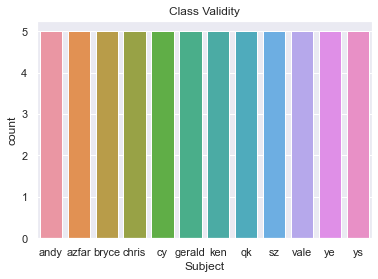

In [7]:
################################
# # check for class validity # #
################################
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="Subject", data=pred_df).set_title("Class Validity")

# remove missing values if available
pred_df = pred_df.dropna()

In [8]:
pred_dataset = pred_df.values
results = pred_dataset[:,CLASSES_COL_NUM]

# # divide data into features X
# pred_row = pred_dataset[:,3:].astype(float)

########################
# # predict all rows # #
########################
pred_row=pred_df.iloc[:,FEATURES_COL_NUM:]

#################################
# # predict more than one row # #
#################################

# pred_row=pred_df.iloc[46:54,FEATURES_COL_NUM:]
# print(pred_row)

############################
# # predict a single row # #
############################

# pred_row=pred_df.iloc[11:12,FEATURES_COL_NUM:]

##################
# # shape data # #
##################
pred_row = pred_row.values.tolist()
pred_arr = np.asarray(pred_row, dtype=np.float32)
pred_arr = np.reshape(pred_arr, (pred_arr.shape[0], TIMESTEPS, pred_arr.shape[1]))

Y = CLASS_LIST
print(Y)
Y = np.asarray(Y)
Y = Y.reshape(-1, 1)
lb = LabelBinarizer().fit(Y)
Y = lb.transform(Y)

['andy', 'azfar', 'bryce', 'chris', 'cy', 'gerald', 'ken', 'qk', 'sz', 'vale', 'ye', 'ys']


In [9]:
####################################
# # get prediction and its label # #
####################################

pred_proba = model.predict(pred_arr)

# pred_proba = np.sum(pred_proba, axis=0)
# pred_proba = np.reshape(pred_proba, (1, 9))

pred = lb.inverse_transform(pred_proba)
acc = np.max(pred_proba, axis=1)

pred_results = np.column_stack((pred, acc))
pred_results = np.column_stack((results, pred_results))

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

df = pd.DataFrame(data=pred_results, index=None, columns=['Results', 'Prediction', 'Accuracy'])
# df = pd.DataFrame(data=pred_results, index=None, columns=['Prediction', 'Accuracy'])
print(df)

# =IF(EXACT(B2, C2), "Match", "Nope")

df.to_csv(RESULT_NAME)

   Results Prediction    Accuracy
0     andy        ken    0.999777
1     andy        ken  0.99980956
2     andy        ken   0.9998567
3     andy        ken   0.9998535
4     andy        ken   0.9997979
5    azfar      azfar  0.99983215
6    azfar      azfar  0.99982905
7    azfar      azfar  0.99981934
8    azfar      chris  0.88785505
9    azfar      chris  0.95756245
10   bryce      bryce  0.98381096
11   bryce      bryce   0.5886656
12   bryce      bryce   0.9156028
13   bryce      bryce  0.95187026
14   bryce      bryce   0.9165596
15   chris      bryce   0.9742829
16   chris         ye    0.974683
17   chris         ye   0.9988102
18   chris         ye  0.99837804
19   chris         ye   0.9581248
20      cy         qk  0.99159425
21      cy         qk  0.85923404
22      cy         qk   0.9853925
23      cy         qk  0.77611053
24      cy         qk   0.8258737
25  gerald      chris  0.94914037
26  gerald      bryce   0.7825753
27  gerald      chris  0.81545514
28  gerald    